# NLP & Sentiment Analysis.

En esta etapa del proyecto manejaremos diferentes modelos pre-entrenados (librerías) y trataremos de evaluar cuál es el que nos ofrece mejores resultados.

Evidentemente, sería conveniente desarrollar un modelo propio ad-hoc según las necesidades particulares del proyecto, lo cual probablemente nos permita alcanzar resultados más precisos. Sin embargo, no debemos olvidar que por el momento pretendemos construir las bases del proyecto y obtener un mínimo producto viable que demuestre su potencial. Disponemos de muy poco tiempo como para desarrollar y entrenar nuestro propio modelo y es por eso que se opta por la utilización de modelos pre-entrenados de NLP a la hora de analizar el sentimiento de los tweets y, por tanto, la percepción del usuario respecto de las marcas.

Los análisis de sentimiento se ejecutarán a través de funciones previamente definidas en *' src / nlp_functions.py '*.

In [1]:
from src.nlp_functions import *

import pandas as pd

In [2]:
brands_tweets = pd.read_pickle('data/car_brands_tokens.pkl')

In [3]:
brands_tweets.head()

,text,hashtags,brand_attribute,brand,token
0,i was told by bmw you need to replace the batt...,[],quality,bmw,"[told, bmw, need, replace, battery, approx, yr..."
1,a new listing for bmw e two eight m five engin...,[],quality,bmw,"[new, listing, bmw, e, engine, posted, race, p..."
2,he only led a few hundert meters at the austri...,[],quality,bmw,"[led, hundert, meter, austrian, gp, blew, migh..."
3,russians making bmw seeking missiles it s over...,[],quality,bmw,"[russian, making, bmw, seeking, missile, baltic]"
4,does anyone want to hati will just get doyoung...,[],quality,bmw,"[want, hati, doyoung, fortune, selca, gt, lt, ..."


### TextBlob (spaCy)

In [4]:
'''INTRO!!!'''

# Esplicación breve.

# Catarse bien de cómo funciona.
# Ojo instalaciones (lo he metido en todos laos).


'INTRO!!!'

In [5]:
brands_tweets['blob_scores'] = brands_tweets.token.apply(blob_scoring)

In [6]:
brands_tweets.sample(10)

,text,hashtags,brand_attribute,brand,token,blob_scores
1127,dollarsuvxy dollarssqqq at an extreme alleviat...,[],price,hyundai,"[dollarsuvxy, dollarssqqq, extreme, alleviated...",0.187500
2319,ford unveils new structure as it speeds electr...,[#businessNews],quality,ford,"[ford, unveils, new, structure, speed, electri...",0.136364
1678,two zero one three hyundai sonata fourdr sdn t...,[],price,hyundai,"[zero, hyundai, sonata, fourdr, sdn, fourl, au...",0.000000
326,for volkswagen jetta beetle dorman secondary a...,[],quality,volkswagen,"[volkswagen, jetta, beetle, dorman, secondary,...",-0.300000
1171,skill lync and renault nissan technology amp b...,[],price,renault,"[skill, lync, renault, nissan, technology, amp...",0.000000
4027,i would again request you how fiat currency an...,[],price,fiat,"[request, fiat, currency, money, work, way, cr...",0.000000
2623,henry ford wrote when everything seems to be g...,[],quality,ford,"[henry, ford, wrote, going, remember, airplane...",0.600000
551,upgraded amphibious vintage volkswagen van,[],quality,volkswagen,"[upgraded, amphibious, vintage, volkswagen, van]",0.000000
424,hardly but she s frugal invested wisely amp ha...,[],quality,bmw,"[hardly, frugal, invested, wisely, amp, doggon...",0.338542
2308,great night at with domenico de sole chairman ...,[],quality,ford,"[great, night, domenico, de, sole, chairman, t...",0.350000


### VADER.

VADER (Valence Aware Dictionary and sEntiment Reasoner) es una librería utilizada para el análisis del sentimiento que se enfoca en los textos de social media. Así, pone énfases en las rules que captan la esencia del texto que normalmente se ve en las redes sociales. Algo interesante de VADER es que está pensado para poder actuar sobre texto sobre el que se ha hecho un limpieza muy básica (conservando emojis, signos de exclamación, etc.). Nosotros lo probaremos sobre los datos ya limpios ya que confiamos en que ofrecerán un mejor resultado (aunque no se presenta el proceso, se ha probado con los datos originales en bruto, pero no consique analizar los sentimientos correctamente y la gran mayoría de scores para negatividad, neutralidad y positivadad son 0). No obstante, lo ideal sería evaluar la precisión del análisis sobre tweets con diferentes niveles de limpieza (desde el más básico, al más detallista) y comparar los modelos para identificar el que ofrece un mayor rendimiento (incluyendo también los análisis desarrollados mediante otros modelos diferentes a VADER).

https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

In [7]:
brands_tweets['vader_scores'] = brands_tweets.token.apply(vader_scoring)

In [8]:
brands_tweets.sample(10)

,text,hashtags,brand_attribute,brand,token,blob_scores,vader_scores
3277,well they have a finite life,[],quality,hyundai,"[finite, life]",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3894,now playing eris ford evan and eris keep me li...,[#NowPlaying],quality,ford,"[playing, eris, ford, evan, eris, listen, favo...",0.500000,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp..."
5043,ha and leading the pack is a bmw and an audi,[],quality,audi,"[ha, leading, pack, bmw, audi]",0.000000,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp..."
4833,volkswagen volvo gm amp more automakers halt v...,[],quality,volkswagen,"[volkswagen, volvo, gm, amp, automaker, halt, ...",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3780,the alliance electrifies mobility welcome to n...,"[#mobility!, #hybrid]",quality,renault,"[alliance, electrifies, mobility, welcome, nis...",0.468182,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp..."
4137,brambilla wearing a bmw jacket,[],price,bmw,"[brambilla, wearing, bmw, jacket]",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3734,a bmw with a jesus is lord sticker just cut me...,[],quality,bmw,"[bmw, jesus, lord, sticker, cut, slam, brake, ...",0.000000,"{'neg': 0.309, 'neu': 0.526, 'pos': 0.164, 'co..."
226,bosal four threenf one eightw rear right muffl...,[],quality,audi,"[bosal, threenf, eightw, rear, right, muffler,...",0.342857,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp..."
3670,yeah i m like bro that s ur idea aa didn t say...,[],price,bmw,"[yeah, like, bro, ur, idea, aa, like, saying, ...",-0.233333,"{'neg': 0.178, 'neu': 0.409, 'pos': 0.413, 'co..."
1181,why tesla over the bmw,[],quality,bmw,"[tesla, bmw]",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [9]:
brands_tweets.blob_scores.value_counts()

 0.000000    17079
 0.136364     1442
 0.500000     1087
 0.400000      965
 0.468182      745
             ...  
 0.696429        1
 0.227381        1
 0.029167        1
-0.018750        1
-0.387879        1
Name: blob_scores, Length: 2985, dtype: int64

In [10]:
type(brands_tweets.vader_scores[2].reset_index().vader_scores[0])

dict

In [11]:
brands_tweets.reset_index(inplace = True)

# Resultados del Análisis.

## Blob Scores

In [12]:
brands_tweets.blob_scores.mean()

0.09297677256130484

**Resultados BMW:**

In [13]:
bmw_price = brands_tweets[(brands_tweets['brand'] == 'bmw') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [14]:
print('Precio BMW: ', bmw_price.blob_scores.mean())

Precio BMW:  0.1317321158080144


In [15]:
bmw_quality = brands_tweets[(brands_tweets['brand'] == 'bmw') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [16]:
print('Calidad BMW: ', bmw_quality.blob_scores.mean())

Calidad BMW:  0.16829674466801028


**Resultados Audi:**

In [17]:
audi_price = brands_tweets[(brands_tweets['brand'] == 'audi') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [18]:
print('Precio Audi: ', audi_price.blob_scores.mean())

Precio Audi:  0.13154333110742686


In [19]:
audi_quality = brands_tweets[(brands_tweets['brand'] == 'audi') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [20]:
print('Calidad Audi: ', audi_quality.blob_scores.mean())

Calidad Audi:  0.19035204350278392


**Resultados Volkswagen:**

In [21]:
volkswagen_price = brands_tweets[(brands_tweets['brand'] == 'volkswagen') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [22]:
print('Precio Volkswagen: ', volkswagen_price.blob_scores.mean())

Precio Volkswagen:  0.1542028084821452


In [23]:
volkswagen_quality = brands_tweets[(brands_tweets['brand'] == 'volkswagen') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [24]:
print('Calidad Volkswagen: ', volkswagen_quality.blob_scores.mean())

Calidad Volkswagen:  0.1728424276679489


**Resultados Renault:**

In [25]:
renault_price = brands_tweets[(brands_tweets['brand'] == 'renault') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [26]:
print('Precio Renault: ', renault_price.blob_scores.mean())

Precio Renault:  0.1348203829739254


In [27]:
renault_quality = brands_tweets[(brands_tweets['brand'] == 'renault') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [28]:
print('Calidad Renault: ', renault_quality.blob_scores.mean())

Calidad Renault:  0.1483066381195432


**Resultados Fiat:**

In [29]:
fiat_price = brands_tweets[(brands_tweets['brand'] == 'fiat') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [30]:
print('Precio Fiat: ', fiat_price.blob_scores.mean())

Precio Fiat:  0.0714856222823531


In [31]:
fiat_quality = brands_tweets[(brands_tweets['brand'] == 'fiat') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [32]:
print('Calidad Fiat: ', fiat_quality.blob_scores.mean())

Calidad Fiat:  0.13572824342499473


**Resultados Ferrari:**

In [33]:
ferrari_price = brands_tweets[(brands_tweets['brand'] == 'ferrari') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [34]:
print('Precio Ferrari: ', ferrari_price.blob_scores.mean())

Precio Ferrari:  0.12086402312964814


In [35]:
ferrari_quality = brands_tweets[(brands_tweets['brand'] == 'ferrari') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [36]:
print('Calidad Ferrari: ', ferrari_quality.blob_scores.mean())

Calidad Ferrari:  0.14071384398605655


**Resultados Lamborghini:**

In [37]:
lamborghini_price = brands_tweets[(brands_tweets['brand'] == 'lamborghini') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [38]:
print('Precio Lamborghini: ', lamborghini_price.blob_scores.mean())

Precio Lamborghini:  0.3386361634121229


In [39]:
lamborghini_quality = brands_tweets[(brands_tweets['brand'] == 'lamborghini') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [40]:
print('Calidad Lamborghini: ', lamborghini_quality.blob_scores.mean())

Calidad Lamborghini:  0.17023723944063776


**Resultados Hyundai:**

In [41]:
hyundai_price = brands_tweets[(brands_tweets['brand'] == 'hyundai') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [42]:
print('Precio Hyundai: ', hyundai_price.blob_scores.mean())

Precio Hyundai:  0.1481464112135965


In [43]:
hyundai_quality = brands_tweets[(brands_tweets['brand'] == 'hyundai') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [44]:
print('Calidad Hyundai: ', hyundai_quality.blob_scores.mean())

Calidad Hyundai:  0.2091447548097172


**Resultados Peugeot:**

In [45]:
peugeot_price = brands_tweets[(brands_tweets['brand'] == 'peugeot') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [46]:
print('Precio Peugeot: ', peugeot_price.blob_scores.mean())

Precio Peugeot:  0.15054827367194953


In [47]:
peugeot_quality = brands_tweets[(brands_tweets['brand'] == 'peugeot') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [48]:
print('Calidad Peugeot: ', peugeot_quality.blob_scores.mean())

Calidad Peugeot:  0.17631208395919654


**Resultados Ford:**

In [49]:
ford_price = brands_tweets[(brands_tweets['brand'] == 'ford') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['blob_scores'] != 0.000)]

In [50]:
print('Precio Ford: ', ford_price.blob_scores.mean())

Precio Ford:  0.07037849590558293


In [51]:
ford_quality = brands_tweets[(brands_tweets['brand'] == 'ford') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['blob_scores'] != 0.000)]

In [52]:
print('Calidad Ford: ', ford_quality.blob_scores.mean())

Calidad Ford:  0.11465949178911926


### Visualización de Resultados (blob scores).

**Creamos la tabla a partir de la cual generamos el gráfico (preparamos los datos).**

In [78]:
car_brands = [
    
{'brand':'BMW', 'price_score': 1-bmw_price.blob_scores.mean(), 'quality_score': bmw_quality.blob_scores.mean()},
{'brand':'Audi', 'price_score': 1-audi_price.blob_scores.mean(), 'quality_score': audi_quality.blob_scores.mean()},
{'brand':'Volkswagen', 'price_score': 1-volkswagen_price.blob_scores.mean(), 'quality_score': volkswagen_quality.blob_scores.mean()},
{'brand':'Renault', 'price_score': 1-renault_price.blob_scores.mean(), 'quality_score': renault_quality.blob_scores.mean()},
{'brand':'Fiat', 'price_score': 1-fiat_price.blob_scores.mean(), 'quality_score': fiat_quality.blob_scores.mean()},
{'brand':'Ferrari', 'price_score': 1-ferrari_price.blob_scores.mean(), 'quality_score': ferrari_quality.blob_scores.mean()},
{'brand':'Lamborghini', 'price_score': 1-lamborghini_price.blob_scores.mean(), 'quality_score': lamborghini_quality.blob_scores.mean()},
{'brand':'Hyundai', 'price_score': 1-hyundai_price.blob_scores.mean(), 'quality_score': hyundai_quality.blob_scores.mean()},
{'brand':'Peugeot', 'price_score': 1-peugeot_price.blob_scores.mean(), 'quality_score': peugeot_quality.blob_scores.mean()},
{'brand':'Ford', 'price_score': 1-ford_price.blob_scores.mean(), 'quality_score': ford_quality.blob_scores.mean()},
]

In [79]:
car_brands_df = pd.DataFrame(car_brands)

car_brands_df

,brand,price_score,quality_score
0,BMW,0.868268,0.168297
1,Audi,0.868457,0.190352
2,Volkswagen,0.845797,0.172842
3,Renault,0.865180,0.148307
4,Fiat,0.928514,0.135728
5,Ferrari,0.879136,0.140714
6,Lamborghini,0.661364,0.170237
7,Hyundai,0.851854,0.209145
8,Peugeot,0.849452,0.176312
9,Ford,0.929622,0.114659


In [58]:
import seaborn as sns

# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'


# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

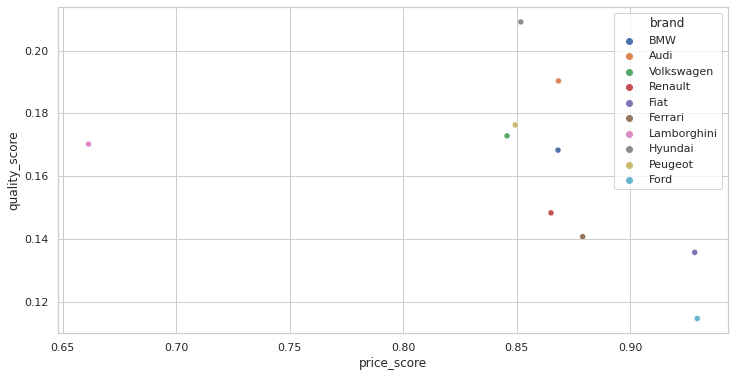

In [80]:
sns.scatterplot(x="price_score", y="quality_score", hue="brand", data=car_brands_df);

In [83]:
import plotly.express as px
fig = px.scatter(x=car_brands_df['price_score'], y=car_brands_df["quality_score"], color=car_brands_df.brand)
fig.show()

## VADER Scores

Nos centraremos en el 'compound score' ya que es el que nos aporta una visión global del análisis del sentimiento de cada tweet.

Para simplificar el proceso, generamos una nueva columna del DataFrame que recoja este score para cada tweet.

In [84]:
brands_tweets.head()

,index,text,hashtags,brand_attribute,brand,token,blob_scores,vader_scores
0,0,i was told by bmw you need to replace the batt...,[],quality,bmw,"[told, bmw, need, replace, battery, approx, yr...",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,a new listing for bmw e two eight m five engin...,[],quality,bmw,"[new, listing, bmw, e, engine, posted, race, p...",0.136364,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,he only led a few hundert meters at the austri...,[],quality,bmw,"[led, hundert, meter, austrian, gp, blew, migh...",0.400000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3,russians making bmw seeking missiles it s over...,[],quality,bmw,"[russian, making, bmw, seeking, missile, baltic]",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,4,does anyone want to hati will just get doyoung...,[],quality,bmw,"[want, hati, doyoung, fortune, selca, gt, lt, ...",0.055556,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp..."


In [86]:
brands_tweets['compound_vader_score']  = brands_tweets['vader_scores'].apply(lambda score_dict: score_dict['compound'])

In [87]:
brands_tweets.head()

,index,text,hashtags,brand_attribute,brand,token,blob_scores,vader_scores,compound_vader_score
0,0,i was told by bmw you need to replace the batt...,[],quality,bmw,"[told, bmw, need, replace, battery, approx, yr...",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00
1,1,a new listing for bmw e two eight m five engin...,[],quality,bmw,"[new, listing, bmw, e, engine, posted, race, p...",0.136364,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00
2,2,he only led a few hundert meters at the austri...,[],quality,bmw,"[led, hundert, meter, austrian, gp, blew, migh...",0.400000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00
3,3,russians making bmw seeking missiles it s over...,[],quality,bmw,"[russian, making, bmw, seeking, missile, baltic]",0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00
4,4,does anyone want to hati will just get doyoung...,[],quality,bmw,"[want, hati, doyoung, fortune, selca, gt, lt, ...",0.055556,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.34


In [12]:
brands_tweets.blob_scores.mean()

0.09297677256130484

**Resultados BMW:**

In [88]:
vader_bmw_price = brands_tweets[(brands_tweets['brand'] == 'bmw') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [89]:
print('Precio BMW: ', vader_bmw_price.compound_vader_score.mean())

Precio BMW:  0.17627474860335193


In [90]:
vader_bmw_quality = brands_tweets[(brands_tweets['brand'] == 'bmw') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [91]:
print('Calidad BMW: ', vader_bmw_quality.compound_vader_score.mean())

Calidad BMW:  0.2281801576872536


**Resultados Audi:**

In [92]:
vader_audi_price = brands_tweets[(brands_tweets['brand'] == 'audi') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [93]:
print('Precio Audi: ', vader_audi_price.compound_vader_score.mean())

Precio Audi:  0.19620984251968504


In [94]:
vader_audi_quality = brands_tweets[(brands_tweets['brand'] == 'audi') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [95]:
print('Calidad Audi: ', vader_audi_quality.compound_vader_score.mean())

Calidad Audi:  0.30930198700802447


**Resultados Volkswagen:**

In [96]:
vader_volkswagen_price = brands_tweets[(brands_tweets['brand'] == 'volkswagen') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [97]:
print('Precio Volkswagen: ', vader_volkswagen_price.compound_vader_score.mean())

Precio Volkswagen:  0.21645562200956936


In [98]:
vader_volkswagen_quality = brands_tweets[(brands_tweets['brand'] == 'volkswagen') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [99]:
print('Calidad Volkswagen: ', vader_volkswagen_quality.compound_vader_score.mean())

Calidad Volkswagen:  0.1748342712177122


**Resultados Renault:**

In [100]:
vader_renault_price = brands_tweets[(brands_tweets['brand'] == 'renault') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [101]:
print('Precio Renault: ', vader_renault_price.compound_vader_score.mean())

Precio Renault:  0.1637200972447326


In [102]:
vader_renault_quality = brands_tweets[(brands_tweets['brand'] == 'renault') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [103]:
print('Calidad Renault: ', vader_renault_quality.compound_vader_score.mean())

Calidad Renault:  0.1856915857605178


**Resultados Fiat:**

In [104]:
vader_fiat_price = brands_tweets[(brands_tweets['brand'] == 'fiat') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [105]:
print('Precio Fiat: ', vader_fiat_price.compound_vader_score.mean())

Precio Fiat:  0.17429604743083005


In [106]:
vader_fiat_quality = brands_tweets[(brands_tweets['brand'] == 'fiat') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [107]:
print('Calidad Fiat: ', vader_fiat_quality.compound_vader_score.mean())

Calidad Fiat:  0.18134893832153692


**Resultados Ferrari:**

In [108]:
vader_ferrari_price = brands_tweets[(brands_tweets['brand'] == 'ferrari') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [109]:
print('Precio Ferrari: ', vader_ferrari_price.compound_vader_score.mean())

Precio Ferrari:  0.25776543209876546


In [110]:
vader_ferrari_quality = brands_tweets[(brands_tweets['brand'] == 'ferrari') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [111]:
print('Calidad Ferrari: ', vader_ferrari_quality.compound_vader_score.mean())

Calidad Ferrari:  0.16871033434650456


**Resultados Lamborghini:**

In [112]:
vader_lamborghini_price = brands_tweets[(brands_tweets['brand'] == 'lamborghini') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [113]:
print('Precio Lamborghini: ', vader_lamborghini_price.compound_vader_score.mean())

Precio Lamborghini:  0.5533183333333332


In [114]:
vader_lamborghini_quality = brands_tweets[(brands_tweets['brand'] == 'lamborghini') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [115]:
print('Calidad Lamborghini: ', vader_lamborghini_quality.compound_vader_score.mean())

Calidad Lamborghini:  0.24955221148957807


**Resultados Hyundai:**

In [116]:
vader_hyundai_price = brands_tweets[(brands_tweets['brand'] == 'hyundai') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [117]:
print('Precio Hyundai: ', vader_hyundai_price.compound_vader_score.mean())

Precio Hyundai:  0.1593408585055644


In [118]:
vader_hyundai_quality = brands_tweets[(brands_tweets['brand'] == 'hyundai') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [119]:
print('Calidad Hyundai: ', vader_hyundai_quality.compound_vader_score.mean())

Calidad Hyundai:  0.19249206134415878


**Resultados Peugeot:**

In [120]:
vader_peugeot_price = brands_tweets[(brands_tweets['brand'] == 'peugeot') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [121]:
print('Precio Peugeot: ', vader_peugeot_price.compound_vader_score.mean())

Precio Peugeot:  0.25531190476190474


In [122]:
vader_peugeot_quality = brands_tweets[(brands_tweets['brand'] == 'peugeot') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [123]:
print('Calidad Peugeot: ', vader_peugeot_quality.compound_vader_score.mean())

Calidad Peugeot:  0.1856633426966292


**Resultados Ford:**

In [124]:
vader_ford_price = brands_tweets[(brands_tweets['brand'] == 'ford') & (brands_tweets['brand_attribute'] == 'price') & (brands_tweets['compound_vader_score'] != 0.000)]

In [125]:
print('Precio Ford: ', vader_ford_price.compound_vader_score.mean())

Precio Ford:  0.12240412168792934


In [126]:
vader_ford_quality = brands_tweets[(brands_tweets['brand'] == 'ford') & (brands_tweets['brand_attribute'] == 'quality') & (brands_tweets['compound_vader_score'] != 0.000)]

In [127]:
print('Calidad Ford: ', vader_ford_quality.compound_vader_score.mean())

Calidad Ford:  0.15438563492063492


### Visualización de Resultados (VADER scores).

**Creamos la tabla a partir de la cual generamos el gráfico (preparamos los datos).**

In [128]:
car_brands_vader = [
    
{'brand':'BMW', 'price_score': 1-vader_bmw_price.compound_vader_score.mean(), 'quality_score': vader_bmw_quality.compound_vader_score.mean()},
{'brand':'Audi', 'price_score': 1-vader_audi_price.compound_vader_score.mean(), 'quality_score': vader_audi_quality.compound_vader_score.mean()},
{'brand':'Volkswagen', 'price_score': 1-vader_volkswagen_price.compound_vader_score.mean(), 'quality_score': vader_volkswagen_quality.compound_vader_score.mean()},
{'brand':'Renault', 'price_score': 1-vader_renault_price.compound_vader_score.mean(), 'quality_score': vader_renault_quality.compound_vader_score.mean()},
{'brand':'Fiat', 'price_score': 1-vader_fiat_price.compound_vader_score.mean(), 'quality_score': vader_fiat_quality.compound_vader_score.mean()},
{'brand':'Ferrari', 'price_score': 1-vader_ferrari_price.compound_vader_score.mean(), 'quality_score': vader_ferrari_quality.compound_vader_score.mean()},
{'brand':'Lamborghini', 'price_score': 1-vader_lamborghini_price.compound_vader_score.mean(), 'quality_score': vader_lamborghini_quality.compound_vader_score.mean()},
{'brand':'Hyundai', 'price_score': 1-vader_hyundai_price.compound_vader_score.mean(), 'quality_score': vader_hyundai_quality.compound_vader_score.mean()},
{'brand':'Peugeot', 'price_score': 1-vader_peugeot_price.compound_vader_score.mean(), 'quality_score': vader_peugeot_quality.compound_vader_score.mean()},
{'brand':'Ford', 'price_score': 1-vader_ford_price.compound_vader_score.mean(), 'quality_score': vader_ford_quality.compound_vader_score.mean()},
]

In [131]:
car_brands_vader_df = pd.DataFrame(car_brands_vader)

car_brands_vader_df

,brand,price_score,quality_score
0,BMW,0.823725,0.228180
1,Audi,0.803790,0.309302
2,Volkswagen,0.783544,0.174834
3,Renault,0.836280,0.185692
4,Fiat,0.825704,0.181349
5,Ferrari,0.742235,0.168710
6,Lamborghini,0.446682,0.249552
7,Hyundai,0.840659,0.192492
8,Peugeot,0.744688,0.185663
9,Ford,0.877596,0.154386


In [58]:
import seaborn as sns

# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'


# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

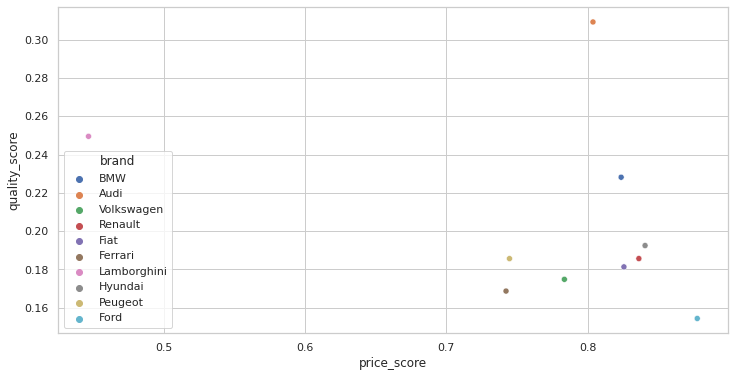

In [134]:
sns.scatterplot(x="price_score", y="quality_score", hue="brand", data=car_brands_vader_df);

In [135]:
import plotly.express as px
fig = px.scatter(x=car_brands_vader_df['price_score'], y=car_brands_vader_df["quality_score"],
                 color=car_brands_vader_df.brand)
fig.show()